In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('/content/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Selecionar colunas relevantes
data = data[['gender', 'race/ethnicity', 'parental level of education', 'math score', 'reading score', 'writing score']]

# Codificar variáveis categóricas
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['race/ethnicity'] = label_encoder.fit_transform(data['race/ethnicity'])
data['parental level of education'] = label_encoder.fit_transform(data['parental level of education'])

data.head()

<ipython-input-5-f929de55be60>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'] = label_encoder.fit_transform(data['gender'])
<ipython-input-5-f929de55be60>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['race/ethnicity'] = label_encoder.fit_transform(data['race/ethnicity'])
<ipython-input-5-f929de55be60>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,gender,race/ethnicity,parental level of education,math score,reading score,writing score
0,0,1,1,72,72,74
1,0,2,4,69,90,88
2,0,1,3,90,95,93
3,1,0,0,47,57,44
4,1,2,4,76,78,75


# Normalizar Dados


scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

pd.DataFrame(data_scaled, columns=data.columns).head()


In [ ]:
# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Exibir os dados processados
dataAux = pd.DataFrame(data_scaled, columns=data.columns)
dataAux.head()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score
0,-0.964625,-1.015044,-0.812640,0.390024,0.193999,0.391492
1,-0.964625,-0.150441,0.827953,0.192076,1.427476,1.313269
2,-0.964625,-1.015044,0.281088,1.577711,1.770109,1.642475
3,1.036672,-1.879647,-1.359505,-1.259543,-0.833899,-1.583744
4,1.036672,-0.150441,0.827953,0.653954,0.605158,0.457333


<Axes: title={'center': 'Pearson Correlation of Features'}>

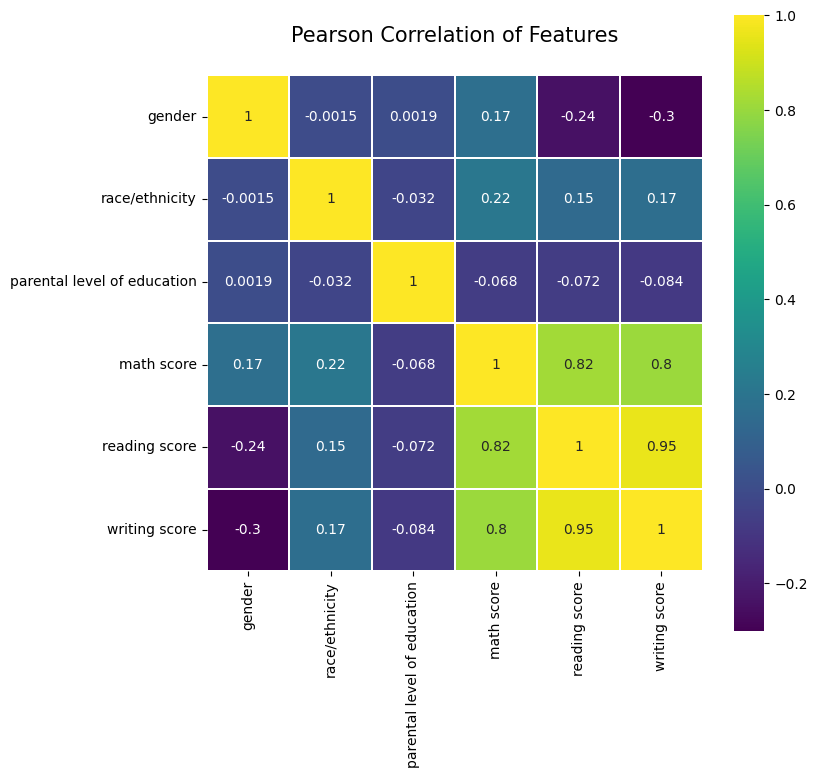

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
colormap = plt.cm.viridis
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dataAux.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

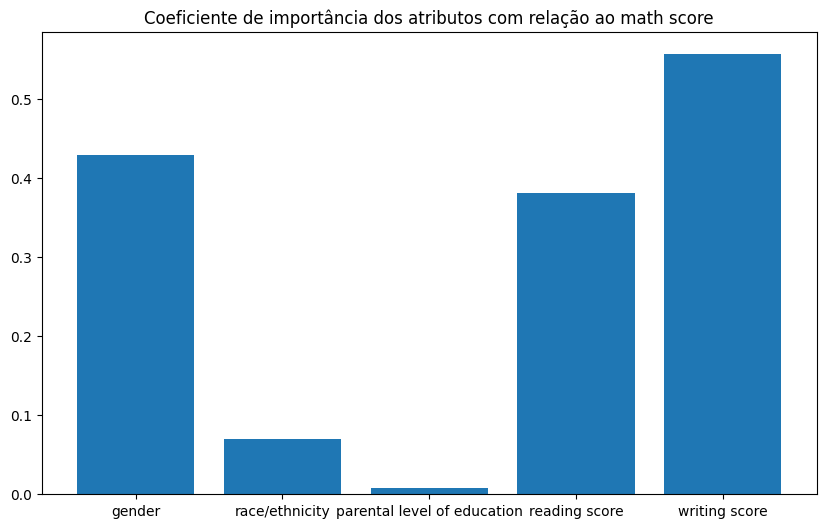

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV
X=dataAux.drop('math score', axis = 1)
y=dataAux['math score']
#Regressão Ridge
ridge = RidgeCV( ).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)
plt.figure(figsize=(10,6))
plt.bar(height=importance, x=feature_names)
plt.title("Coeficiente de importância dos atributos com relação ao math score")
plt.show()

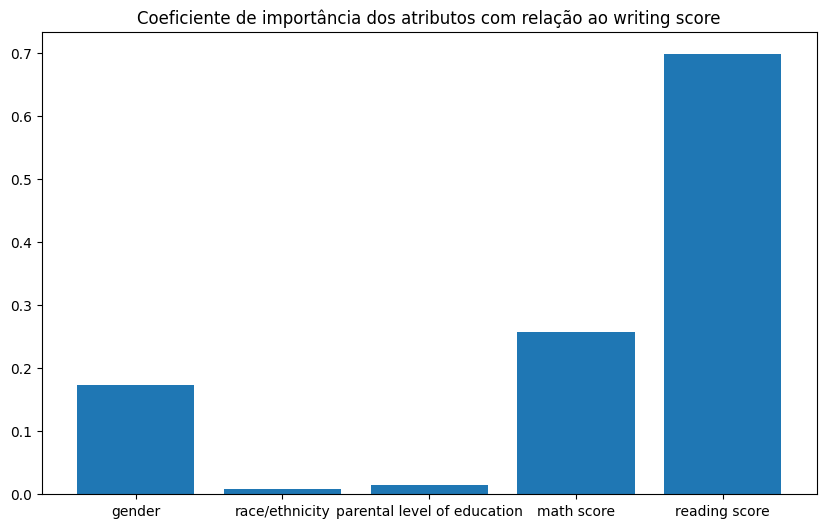

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV
X=dataAux.drop('writing score', axis = 1)
y=dataAux['writing score']
#Regressão Ridge
ridge = RidgeCV( ).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)
plt.figure(figsize=(10,6))
plt.bar(height=importance, x=feature_names)
plt.title("Coeficiente de importância dos atributos com relação ao writing score")
plt.show()

## Inércia (Variância Explicada)

A inércia é uma medida da soma das distâncias quadradas entre as amostras e o centroide mais próximo, representando o quão bem os clusters se ajustam aos dados. Valores menores de inércia indicam clusters mais compactos e, portanto, uma melhor explicação da variabilidade dos dados.

A inércia é uma métrica comum usada para avaliar a qualidade dos clusters formados pelo K-Means. À medida que o número de clusters aumenta, a inércia tende a diminuir, pois mais clusters podem capturar melhor a variabilidade dos dados.

>**Escolha do Número de Clusters:**
Um método comum para escolher o número ótimo de clusters é o "Elbow Method" (Método do Cotovelo), onde a inércia é plotada contra o número de clusters. O ponto onde a taxa de diminuição da inércia começa a diminuir significativamente (formando um cotovelo) é escolhido como o número ótimo de clusters

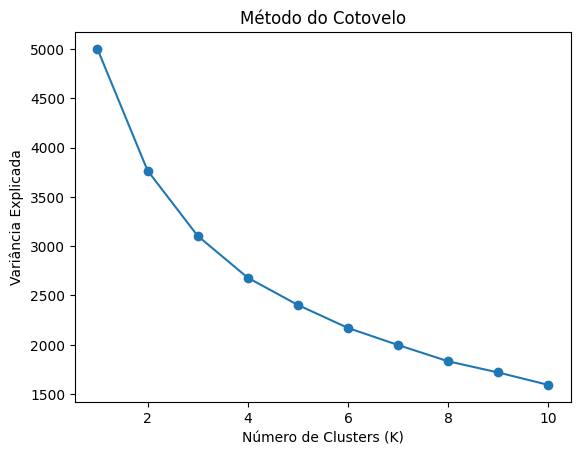

In [ ]:
from sklearn.cluster import KMeans
variance_explained = []
for k in range(1, 11):
    # Criar objeto KMeans
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    variance_explained.append(kmeans.inertia_)  # Armazenar a variância explicada (inércia)

# Plotar o gráfico do método do cotovelo
plt.plot(range(1, 11), variance_explained, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Variância Explicada')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
num_clusters = 3
# Aplicar o K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Exibir os primeiros resultados
print(data.head())


   gender  race/ethnicity  parental level of education  math score  \
0       0               1                            1          72   
1       0               2                            4          69   
2       0               1                            3          90   
3       1               0                            0          47   
4       1               2                            4          76   

   reading score  writing score  Cluster  
0             72             74        2  
1             90             88        2  
2             95             93        2  
3             57             44        1  
4             78             75        0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


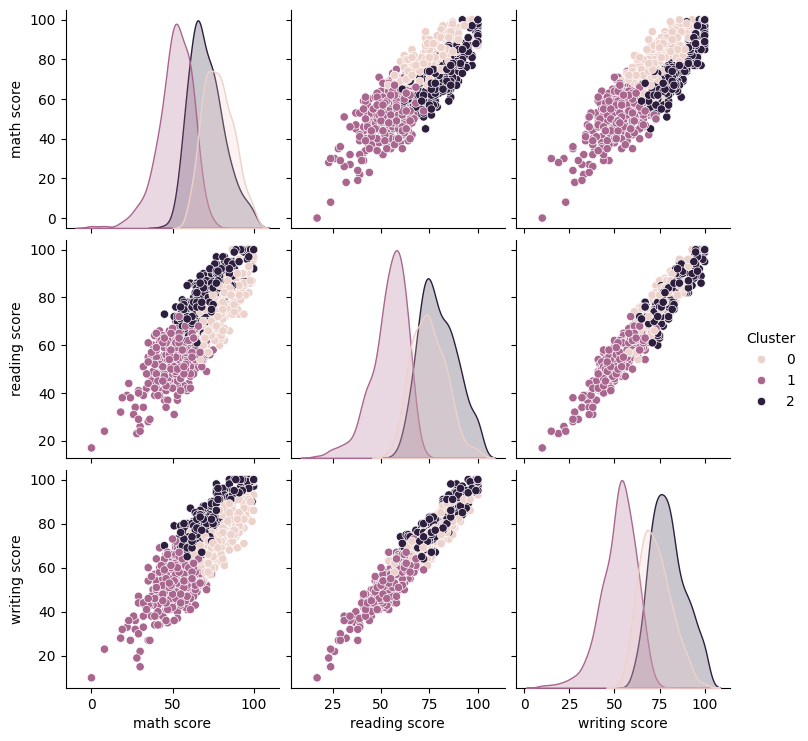

In [ ]:
# Plotar os clusters
sns.pairplot(data, hue='Cluster', vars=['math score', 'reading score', 'writing score'])
plt.show()

# Salvar o dataset enriquecido
data.to_csv('StudentsPerformance_Enriched.csv', index=False)

In [ ]:
# Calcular a média das variáveis em cada cluster
cluster_summary = data.groupby('Cluster')['math score'].mean()
print(cluster_summary)

Cluster
0    78.131673
1    51.467422
2    70.945355
Name: math score, dtype: float64


In [ ]:
cluster_summary = data.groupby('Cluster')['reading score'].mean()
print(cluster_summary)

Cluster
0    74.615658
1    54.042493
2    79.576503
Name: reading score, dtype: float64


In [ ]:
cluster_summary = data.groupby('Cluster')['writing score'].mean()
print(cluster_summary)

Cluster
0    72.729537
1    52.229462
2    79.726776
Name: writing score, dtype: float64


In [ ]:
# Calcular a contagem de cada categoria dentro de cada cluster
cluster_distribution = data.groupby('Cluster').agg({
    'gender': 'value_counts'
}).unstack(fill_value=0)
print(cluster_distribution)

        gender     
gender       0    1
Cluster            
0            0  281
1          152  201
2          366    0


In [ ]:
# Calcular a contagem de cada categoria dentro de cada cluster
cluster_distribution = data.groupby('Cluster').agg({
    'race/ethnicity': 'value_counts'
}).unstack(fill_value=0)
print(cluster_distribution)

               race/ethnicity                 
race/ethnicity              0   1    2   3   4
Cluster                                       
0                          19  35   77  92  58
1                          54  89  115  71  24
2                          16  66  127  99  58


## Perfilação

(cuidado!!)

In [ ]:
# Calcular as médias das notas em cada cluster
cluster_means = data.groupby('Cluster')[['math score', 'reading score', 'writing score']].mean()
print(cluster_means)

         math score  reading score  writing score
Cluster                                          
0         78.131673      74.615658      72.729537
1         51.467422      54.042493      52.229462
2         70.945355      79.576503      79.726776


In [ ]:
# Exibir a distribuição de gênero
cluster_gender = data.groupby('Cluster')['gender'].value_counts(normalize=True)
print("Distribuição de Gênero (0-F, 1-M) em cada Cluster:\n", cluster_gender)

Distribuição de Gênero (0-F, 1-M) em cada Cluster:
 Cluster  gender
0        1         1.000000
1        1         0.569405
         0         0.430595
2        0         1.000000
Name: proportion, dtype: float64


In [ ]:
# Exibir a distribuição de raça
cluster_race = data.groupby('Cluster')['race/ethnicity'].value_counts(normalize=True)
print("Distribuição de Raça/Etnia em cada Cluster:\n", cluster_race)

Distribuição de Raça/Etnia em cada Cluster:
 Cluster  race/ethnicity
0        3                 0.327402
         2                 0.274021
         4                 0.206406
         1                 0.124555
         0                 0.067616
1        2                 0.325779
         1                 0.252125
         3                 0.201133
         0                 0.152975
         4                 0.067989
2        2                 0.346995
         3                 0.270492
         1                 0.180328
         4                 0.158470
         0                 0.043716
Name: proportion, dtype: float64


In [ ]:
# Definir rótulos para clusters com base na análise
# Desempenho acadêmico com base nas notas de portugues e matemática
cluster_names = {
    0: 'B',
    1: 'C',
    2: 'A'
}

# Mapear os nomes dos clusters
data['Academic Performance'] = data['Cluster'].map(cluster_names)

# Exibir o DataFrame atualizado
print(data.head())

# Salvar o dataset enriquecido com nomes de clusters
data.to_csv('StudentsPerformance_Enriched_with_Academic_Performance.csv', index=False)


   gender  race/ethnicity  parental level of education  math score  \
0       0               1                            1          72   
1       0               2                            4          69   
2       0               1                            3          90   
3       1               0                            0          47   
4       1               2                            4          76   

   reading score  writing score  Cluster Academic Performance  
0             72             74        2                    A  
1             90             88        2                    A  
2             95             93        2                    A  
3             57             44        1                    C  
4             78             75        0                    B  


Exercícios

Estude e execute o notebook e especule (discuta) sobre:


1.   Desempenho acadêmico, considerando-se os gêneros?
2.   O que caracteriza os melhores e os piores alunos?

